# Probabilidad de un bin

Compara la probabilidad exacta de un bin con la aproximada: \
$p_i = \int_{x_i}^{x_{i+1}} f(u) \, du \approx f(\hat{x}_i) \, \Delta x$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Bines del histograma

In [2]:
xmin, xmax = -5, 5
nbins = 5

In [3]:
bin_edges = np.linspace(xmin, xmax, nbins+1)
bin_edges

Bordes de los bines = [-5. -3. -1.  1.  3.  5.]


In [4]:
xbin = ( bin_edges[:-1] + bin_edges[1:] ) / 2
xbin

Centros de los bines = [-4. -2.  0.  2.  4.]


In [5]:
bin_width = bin_edges[1:] - bin_edges[:-1]
bin_width

Ancho de los bines = [2. 2. 2. 2. 2.]


## Función de densidad de probabilidad (PDF)

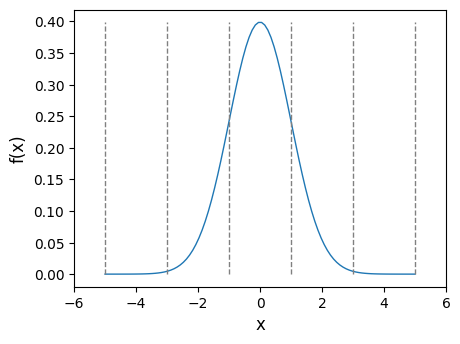

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel("X")
ax1.set_ylabel("f(X)")

# Limits of x-axis
xleft = xmin - 0.5*bin_width[0]
xright = xmax + 0.5*bin_width[-1]
ax1.set_xlim(xleft, xright)

# PDF N(0,1)
x = np.linspace(xmin, xmax, 100)
ax1.plot(x, norm.pdf(x), label='N(0,1)')

# Bin limits
ymax = norm.pdf(0)
ax1.vlines(bin_edges, 0, ymax, color='gray', ls='--',)

## Probabilidad de los bines

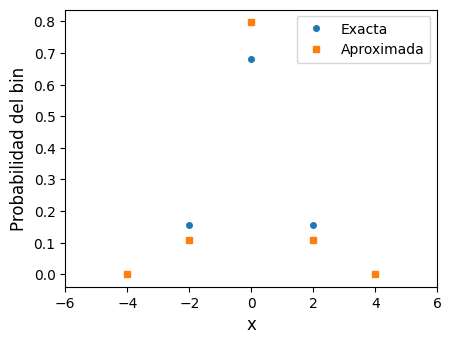

In [8]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel("x")
ax2.set_ylabel("Probabilidad del bin")
ax2.set_xlim(xleft, xright)

# probabilidad exacta
cum_proba = norm.cdf(bin_edges)
pbin1 = cum_proba[1:] - cum_proba[:-1]
ax2.plot(xbin, pbin1, 'o', drawstyle='steps-mid', label="Exacta")

# probabilidad aproximada
pbin2 = norm.pdf(xbin)*bin_width
ax2.plot(xbin, pbin2, 's', drawstyle='steps-mid', label="Aproximada")
ax2.legend()